In [1]:
#%matplotlib notebook
import os, time, sys
import importlib
import tables as tb
import matplotlib.pyplot as plt
import numpy as np
import clicfast2023.clicfast2023 as clicfast2023
import clicfast2023.analysis.interpreter as interpreter
import clicfast2023.analysis.event_builder as event_builder
import clicfast2023.analysis.fitfunctions as fitfunc

# if False:
!ping -c 1 192.168.10.16
if True:
    import clicfast2023.clicfast2023 as clicfast2023
    dut = clicfast2023.Clicfast2023()
    dut.init()
    en_comp = np.copy(dut.PixelConf['en_comp'])
    tdac = np.copy(dut.PixelConf['tdac'])

PING 192.168.10.16 (192.168.10.16) 56(84) bytes of data.
From 192.168.10.1 icmp_seq=1 Destination Host Unreachable

--- 192.168.10.16 ping statistics ---
1 packets transmitted, 0 received, +1 errors, 100% packet loss, time 0ms



OSError: [Errno 113] No route to host

In [2]:
col = 0
comp = 1
delay = 0
dut.set_sync()
dut.set_inj(inj_n=0, inj_delay=10240+delay, inj_width=10240-delay, ext=True)
dut.set_triginj(inj_n=0, inj_delay=10240+delay, inj_width=10240-delay, ext=True)
dut.set_inj_amp(0.5, unit="V")
dut.inject_trig()
dut.set_en_ampout([col])
dut.set_en_inj([col])
dut.set_en_hitbus([col])

dut.PixelConf['en_comp'][:, :] = 0xFF
en_comp = np.copy(dut.PixelConf['en_comp'])
en_comp[:, :] =0
en_comp[col, :] =1  ## enable all comp
dut.set_en_comp(en_comp)



2024-04-23 16:47:32,812 - basil.TL.SiTcp - [WARNING ] (MainThread) SiTcp:_write_single - Read timeout - Retry...
2024-04-23 16:47:33,813 - basil.TL.SiTcp - [WARNING ] (MainThread) SiTcp:_write_single - Read timeout - Retry...


In [17]:
dut.set_conf(VDACTh=0x70,
             VDACBL=0x88,
             BLResP=1,
             IPBigFine=19,
             IPSmallFine=7,
             IPFoll=10,
             IPDAC=0,
             NFB2=1,
             PFB1=5)
dut.set_inj(inj_n=1, inj_delay=10240+delay, inj_width=10240-delay, ext=False)
dut.set_triginj(inj_n=100, inj_delay=(10240+delay)*4, inj_width=(10240-delay)*4, ext=True)
#dut['inj'].set_phase(2)
dut.inject()
dut.inject_trig()
dut.set_rx(False)
dut.set_sync(auto_sync=True)
dut.set_ts_trig(True)
dut.set_ts_inj()
dut.set_rx(True)
dut.mask_rx(True)


2024-04-15 17:42:36,794 - root - [INFO    ] (MainThread) set_conf:VDACTh=112VDACBL=136BLResP=1IPBigFine=19IPSmallFine=7IPFoll=10IPDAC=0NFB2=1PFB1=5
2024-04-15 17:42:36,796 - root - [INFO    ] (MainThread) set_inj: inj_width=10240 inj_delay=10240 inj_n=1 ext=0
2024-04-15 17:42:36,797 - root - [INFO    ] (MainThread) set_triginj: trig_width=40960 trig_delay=40960 trig_n=100 ext=1
2024-04-15 17:42:36,900 - root - [INFO    ] (MainThread) set_sync: sync_period=0x1000000 repeat=0 auto-sync=1 manual-sync=0


KeyError: 'Item not existing: ts_inj'

In [11]:
## get data once
import importlib
importlib.reload(interpreter)
hit, ts, ts_trig =interpreter.raw2list(dut.get_data())
len(hit),len(ts), len(ts_trig)


2024-04-15 17:32:05,124 - root - [WARNING ] (MainThread) get_data: error status=0x0 fifo_size=0 loop=98 ts=0/3


(0, 0, 0)

In [29]:
import clicfast2023.analysis.event_builder as event_builder
importlib.reload(event_builder)
event_builder.hit2ev(hit, ts, idx_offset=0)

array([(0, 1, 0, 51,  7, 53, 0, 312289013786),
       (0, 1, 0, 36, 52, 62, 0, 312289013786),
       (1, 1, 0, 52,  6, 54, 0, 312289034266),
       (2, 1, 0, 51,  7, 51, 0, 312289054746),
       (3, 1, 0, 51,  7, 53, 0, 312289075226),
       (4, 1, 0, 51,  7, 51, 0, 312289095706),
       (4, 1, 0, 36, 58, 26, 0, 312289095706),
       (5, 1, 0, 52,  6, 54, 0, 312289116186),
       (6, 1, 0, 52,  6, 52, 0, 312289136666),
       (7, 1, 0, 51,  7, 53, 0, 312289157146),
       (8, 1, 0, 51,  7, 51, 0, 312289177626),
       (8, 1, 0, 37, 51, 25, 0, 312289177626),
       (9, 1, 0, 51,  7, 53, 0, 312289198106)],
      dtype=[('event_number', '<i8'), ('col', 'u1'), ('comp', 'u1'), ('toa', '<u2'), ('tot', '<u2'), ('tdc', 'u1'), ('err', 'u1'), ('timestamp', '<i8')])

In [17]:
ts

array([( 0, 207381082138, 0), (13, 207381102618, 0),
       (21, 207381123098, 0), (29, 207381143578, 0),
       (37, 207381164058, 0), (50, 207381184538, 0),
       (58, 207381205018, 0), (66, 207381225498, 0),
       (74, 207381245978, 0), (82, 207381266458, 0)],
      dtype=[('event_number', '<i8'), ('timestamp', '<i8'), ('err', 'u1')])

In [8]:
import clicfast2023.scans.injection_scan as injection_scan
# importlib.reload(injection_scan)
dut.set_inj_amp(0.02, 'V')
scan = injection_scan.InjectionScan(dut=dut)
fraw = scan.start(inj=np.arange(0.02, 0.5, 0.02), cols=None, rows=None, plsgen=dut)
fhit = scan.analyze()

## s-curve scan

2023-11-30 18:22:40,360 - root - [INFO    ] (MainThread) inj_amp: 49
2023-11-30 18:22:40,367 - root - [INFO    ] (MainThread) Initializing InjectionScan
2023-11-30 18:22:40,368 - root - [INFO    ] (MainThread) Scan start time: 2023-11-30_18:22:40
2023-11-30 18:22:40,409 - root - [WARNING ] (MainThread) ScanBase.start:sender.init failed addr=tcp://127.0.0.1:6500
2023-11-30 18:22:40,547 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 1248
2023-11-30 18:22:40,970 - root - [INFO    ] (MainThread) Received words: 0
2023-11-30 18:22:40,971 - root - [INFO    ] (MainThread) Data queue size: 0
2023-11-30 18:22:40,972 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2023-11-30 18:22:40,973 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2023-11-30 18:22:40,973 - root - [INFO    ] (MainThread) Discard counter:                0
2023-11-30 18:22:40,974 - root - [INFO    ] (MainThread) Starting FIFO readout...
2023-11-30 18:22:40,976 - root - [INFO    ] (MainThre

0.00s 19378/19378 hit=2444 ts=2400


In [5]:
scan.close()

NameError: name 'scan' is not defined

2023-11-30 18:22:51,285 - matplotlib.legend - [WARNING ] (MainThread) No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


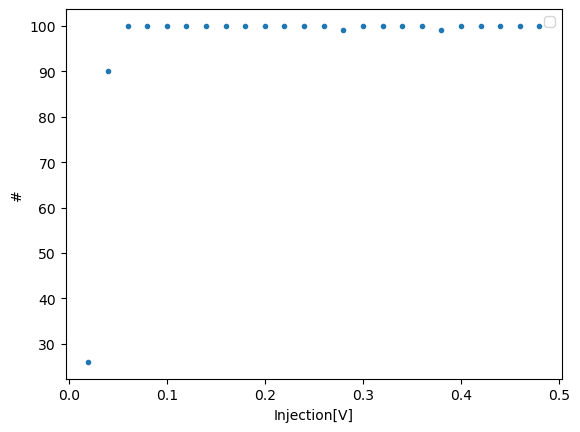

In [237]:
with tb.open_file(fhit) as f:
    dat = f.root.event_data[:]
with tb.open_file(fraw) as f:
    param = f.root.scan_parameters[:]
    
dat0 = dat[dat['comp']==0]
uni, idx= np.unique(dat0['timestamp'], return_index=True)
dat0 = dat0[idx]
nhit = np.bincount(dat0['event_number']) #, minlength=len(param))
plt.plot(param['inj'], nhit, '.')

plt.xlabel('Injection[V]')
plt.ylabel('#')
plt.legend()

Text(0.5, 1.0, 'Comparator1')

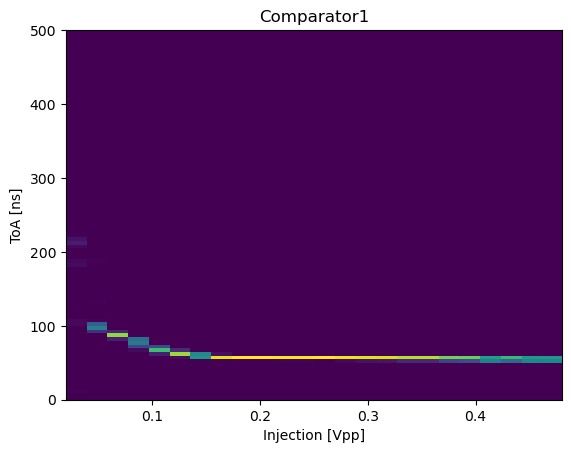

In [238]:
## timewalk
n = 100 #2**11
nsteps = param.shape[0]
toa = np.empty([n, nsteps])
for i in range(nsteps):
    ev = dat0[dat0['event_number']==i]
    tmp = np.array([
            ev['col']==col,
            ev['row']==row])
    ev = ev[np.all(tmp, axis=0)]
    toa[:,i] = np.bincount(ev['toa'], minlength=n)[:n]

plt.imshow(toa, origin='lower', extent=(param['inj'][0], param['inj'][-1], 0, n*5), aspect='auto')
plt.xlabel('Injection [Vpp]')
plt.ylabel('ToA [ns]')
plt.title('Comparator1')


Text(0.5, 1.0, 'Comparator1')

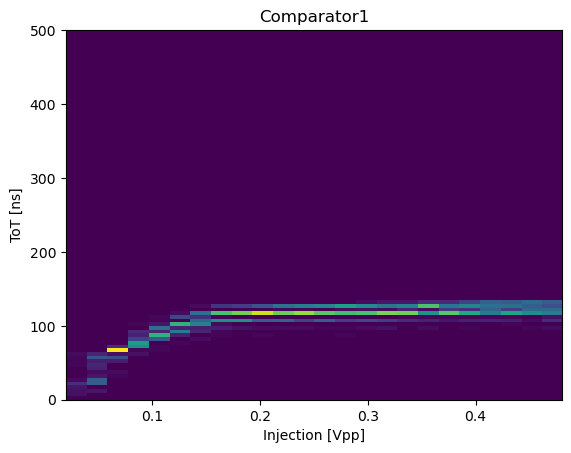

In [239]:
## timewalk
n = 100 #2**11
nsteps = param.shape[0]
tot = np.empty([n, nsteps])
for i in range(nsteps):
    ev = dat0[dat0['event_number']==i]
    tmp = np.array([
            ev['col']==col,
            ev['row']==row])
    ev = ev[np.all(tmp, axis=0)]
    tot[:,i] = np.bincount(ev['tot'], minlength=n)[:n]

plt.imshow(tot, origin='lower', extent=(param['inj'][0], param['inj'][-1], 0, n*5), aspect='auto')
plt.xlabel('Injection [Vpp]')
plt.ylabel('ToT [ns]')
plt.title('Comparator1')


In [26]:
dut.set_rx(False)